In [1]:
#load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
from copy import deepcopy
import numpy as np
import pandas as pd
from PIL import Image
from itertools import product
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

https://github.com/alianoroozi/Image-Clustering/blob/master/Image_clustering_agglomerative_from_scratch.ipynb

In [2]:
#load image into numpy array
orange = "ORANGE.png"
img = Image.open(orange) 

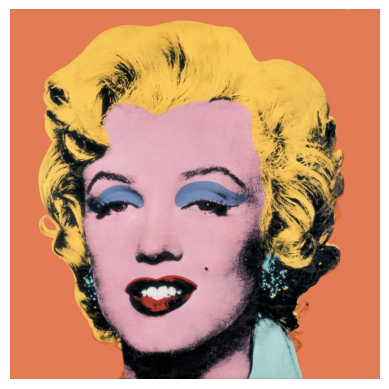

In [3]:
plt.imshow(img)
plt.axis('off')
plt.show()

In [4]:
#centering 
center = sorted(list(range(4,256,8))*8)
list(zip(range(0,256),center))

[(0, 4),
 (1, 4),
 (2, 4),
 (3, 4),
 (4, 4),
 (5, 4),
 (6, 4),
 (7, 4),
 (8, 12),
 (9, 12),
 (10, 12),
 (11, 12),
 (12, 12),
 (13, 12),
 (14, 12),
 (15, 12),
 (16, 20),
 (17, 20),
 (18, 20),
 (19, 20),
 (20, 20),
 (21, 20),
 (22, 20),
 (23, 20),
 (24, 28),
 (25, 28),
 (26, 28),
 (27, 28),
 (28, 28),
 (29, 28),
 (30, 28),
 (31, 28),
 (32, 36),
 (33, 36),
 (34, 36),
 (35, 36),
 (36, 36),
 (37, 36),
 (38, 36),
 (39, 36),
 (40, 44),
 (41, 44),
 (42, 44),
 (43, 44),
 (44, 44),
 (45, 44),
 (46, 44),
 (47, 44),
 (48, 52),
 (49, 52),
 (50, 52),
 (51, 52),
 (52, 52),
 (53, 52),
 (54, 52),
 (55, 52),
 (56, 60),
 (57, 60),
 (58, 60),
 (59, 60),
 (60, 60),
 (61, 60),
 (62, 60),
 (63, 60),
 (64, 68),
 (65, 68),
 (66, 68),
 (67, 68),
 (68, 68),
 (69, 68),
 (70, 68),
 (71, 68),
 (72, 76),
 (73, 76),
 (74, 76),
 (75, 76),
 (76, 76),
 (77, 76),
 (78, 76),
 (79, 76),
 (80, 84),
 (81, 84),
 (82, 84),
 (83, 84),
 (84, 84),
 (85, 84),
 (86, 84),
 (87, 84),
 (88, 92),
 (89, 92),
 (90, 92),
 (91, 92),
 (92, 

In [5]:
#get pixel values using getdata -  cant use getdata use load
def index(image):
    """Take an image and return all possible (x,y) coordinate combinations"""
    width, height = Image.open(image).size
    return list(product(np.arange(width),np.arange(height)))
def color(image):
    """Take an image and return rgb values for every pixel"""
    im = Image.open(image) 
    pix = im.load()
    rgb = [pix[i,j] for i,j in index(image)]
    return rgb
pix = img.load()
rgb = [pix[i,j] for i,j in index(orange)]
def extract(image):
    img_data = list(zip(index(image),color(image)))
    df = []
    for i in img_data:
        columns = {'x':i[0][0],'y':i[0][1],'R':i[1][0],'G':i[1][1],'B':i[1][2]}
        df.append(columns)
    return pd.DataFrame(df)

In [6]:
orange_p = extract(orange) #get pixels 
orange_p

,x,y,R,G,B
0,0,0,209,117,110
1,0,1,213,109,100
2,0,2,219,111,96
3,0,3,203,123,97
4,0,4,216,116,85
...,...,...,...,...,...
562495,749,745,214,121,69
562496,749,746,211,119,75
562497,749,747,214,118,72
562498,749,748,214,116,63


In [7]:
for i,j in zip(range(0,256),center):
    orange_p['R'] = orange_p['R'].replace(i,j)
    orange_p['G'] = orange_p['G'].replace(i,j)
    orange_p['B'] = orange_p['B'].replace(i,j)

In [8]:
#convert to numpy array for clustering
orange_p.to_numpy()

array([[  0,   0, 212, 116, 108],
       [  0,   1, 212, 108, 100],
       [  0,   2, 220, 108, 100],
       ...,
       [749, 747, 212, 116,  76],
       [749, 748, 212, 116,  60],
       [749, 749, 228, 124,  52]])

In [9]:
df = [tuple(i) for i in orange_p.to_numpy()]

In [10]:
im = Image.open('ORANGE.png') 
pix = im.load()
for x,y,R,G,B in df:
    pix[x,y] = (R,G,B)
im
im.save('orange_center.png') #save centered 

In [11]:
df1 = orange_p.iloc[:,2:].drop_duplicates()
df1

,R,G,B
0,212,116,108
1,212,108,100
2,220,108,100
3,204,124,100
4,220,116,84
...,...,...,...
557252,228,116,108
560253,252,116,76
561002,236,124,108
561752,204,116,108


In [12]:
#clustering
#only 16 clusters (0-15) max clusters anything more is blank
clust = AgglomerativeClustering(n_clusters=16, linkage='average')
clusts = clust.fit(np.asarray(df1))
df1['Cluster'] = clusts.labels_
df1

,R,G,B,Cluster
0,212,116,108,3
1,212,108,100,3
2,220,108,100,3
3,204,124,100,3
4,220,116,84,3
...,...,...,...,...
557252,228,116,108,3
560253,252,116,76,3
561002,236,124,108,3
561752,204,116,108,3


In [13]:
#get the distances for the tree
##if euclidean distance use complete method from linkage function like shuting and fushing
### single and complete are the most common
distance = linkage(df1.to_numpy(), method = 'complete')

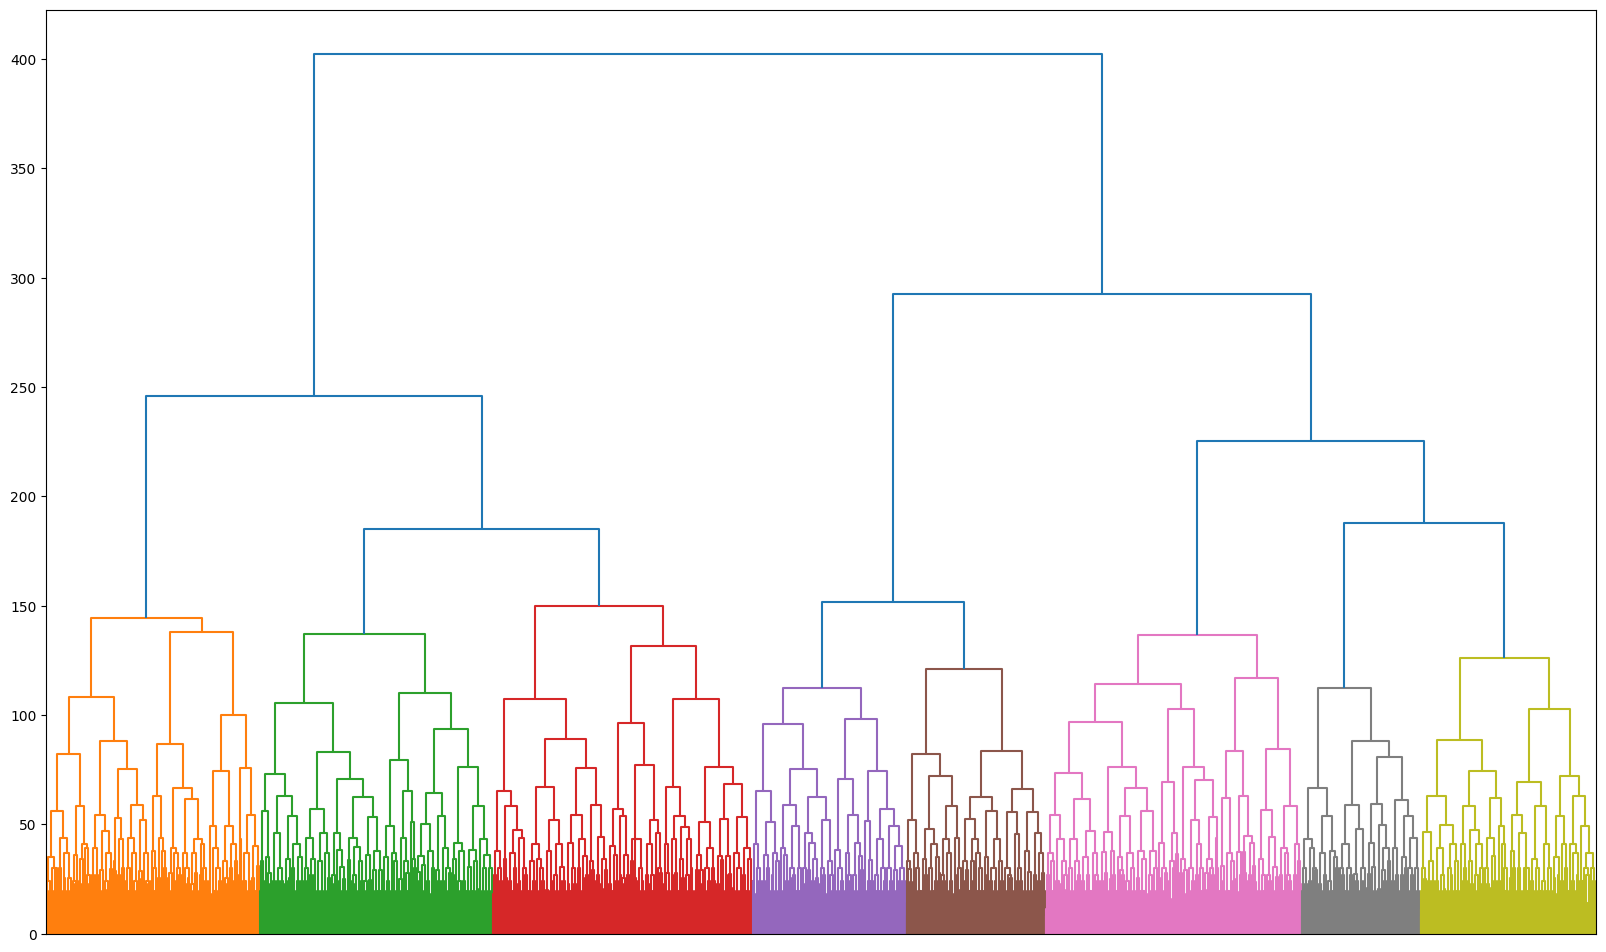

In [14]:
plt.figure(figsize = (20,12))
#color threshold see y values, colors based on if the node reaches that value
dendrogram(distance, no_labels = True, color_threshold = 150)
plt.show()

In [15]:
#extract each individual cluster part
## get the most common color in that cluster
df2 = extract('orange_center.png')
df2
df3 = df2.merge(df1,on = ['R','G','B'],how = 'inner')
df3

,x,y,R,G,B,Cluster
0,0,0,212,116,108,3
1,0,1,212,108,100,3
2,0,2,220,108,100,3
3,1,0,220,108,100,3
4,749,3,220,108,100,3
...,...,...,...,...,...,...
562495,743,2,228,116,108,3
562496,747,3,252,116,76,3
562497,748,2,236,124,108,3
562498,749,2,204,116,108,3


In [16]:
df3['Cluster'].value_counts()

3     203382
8     105503
1      93651
15     57499
2      21052
0      12329
12     10939
9      10563
13      9045
6       8400
4       8300
7       8247
5       5904
11      5365
10      1802
14       519
Name: Cluster, dtype: int64

In [17]:
# Curtis's version to read the clusters 

## want to identify which pixels are in each cluster
def cluster(cluster,image):
    #cluster number we want
    white = (255,255,255)
    nclust_pix = df3.loc[df3['Cluster'] != cluster]
    # get x,y of pixels in cluster
    clust_img = Image.open(image)
    background = clust_img.load()
    for i,j in zip(list(nclust_pix['x']),list(nclust_pix['y'])):
        background[i,j] = white#[255,255,255]
    return clust_img

In [18]:
#Save orange eyeshadow and background
orange_back=cluster(3,'orange_center.png')
orange_back.save('orange_back.png')
orange_eye=cluster(11,'orange_center.png')
orange_eye.save('orange_eye.png')

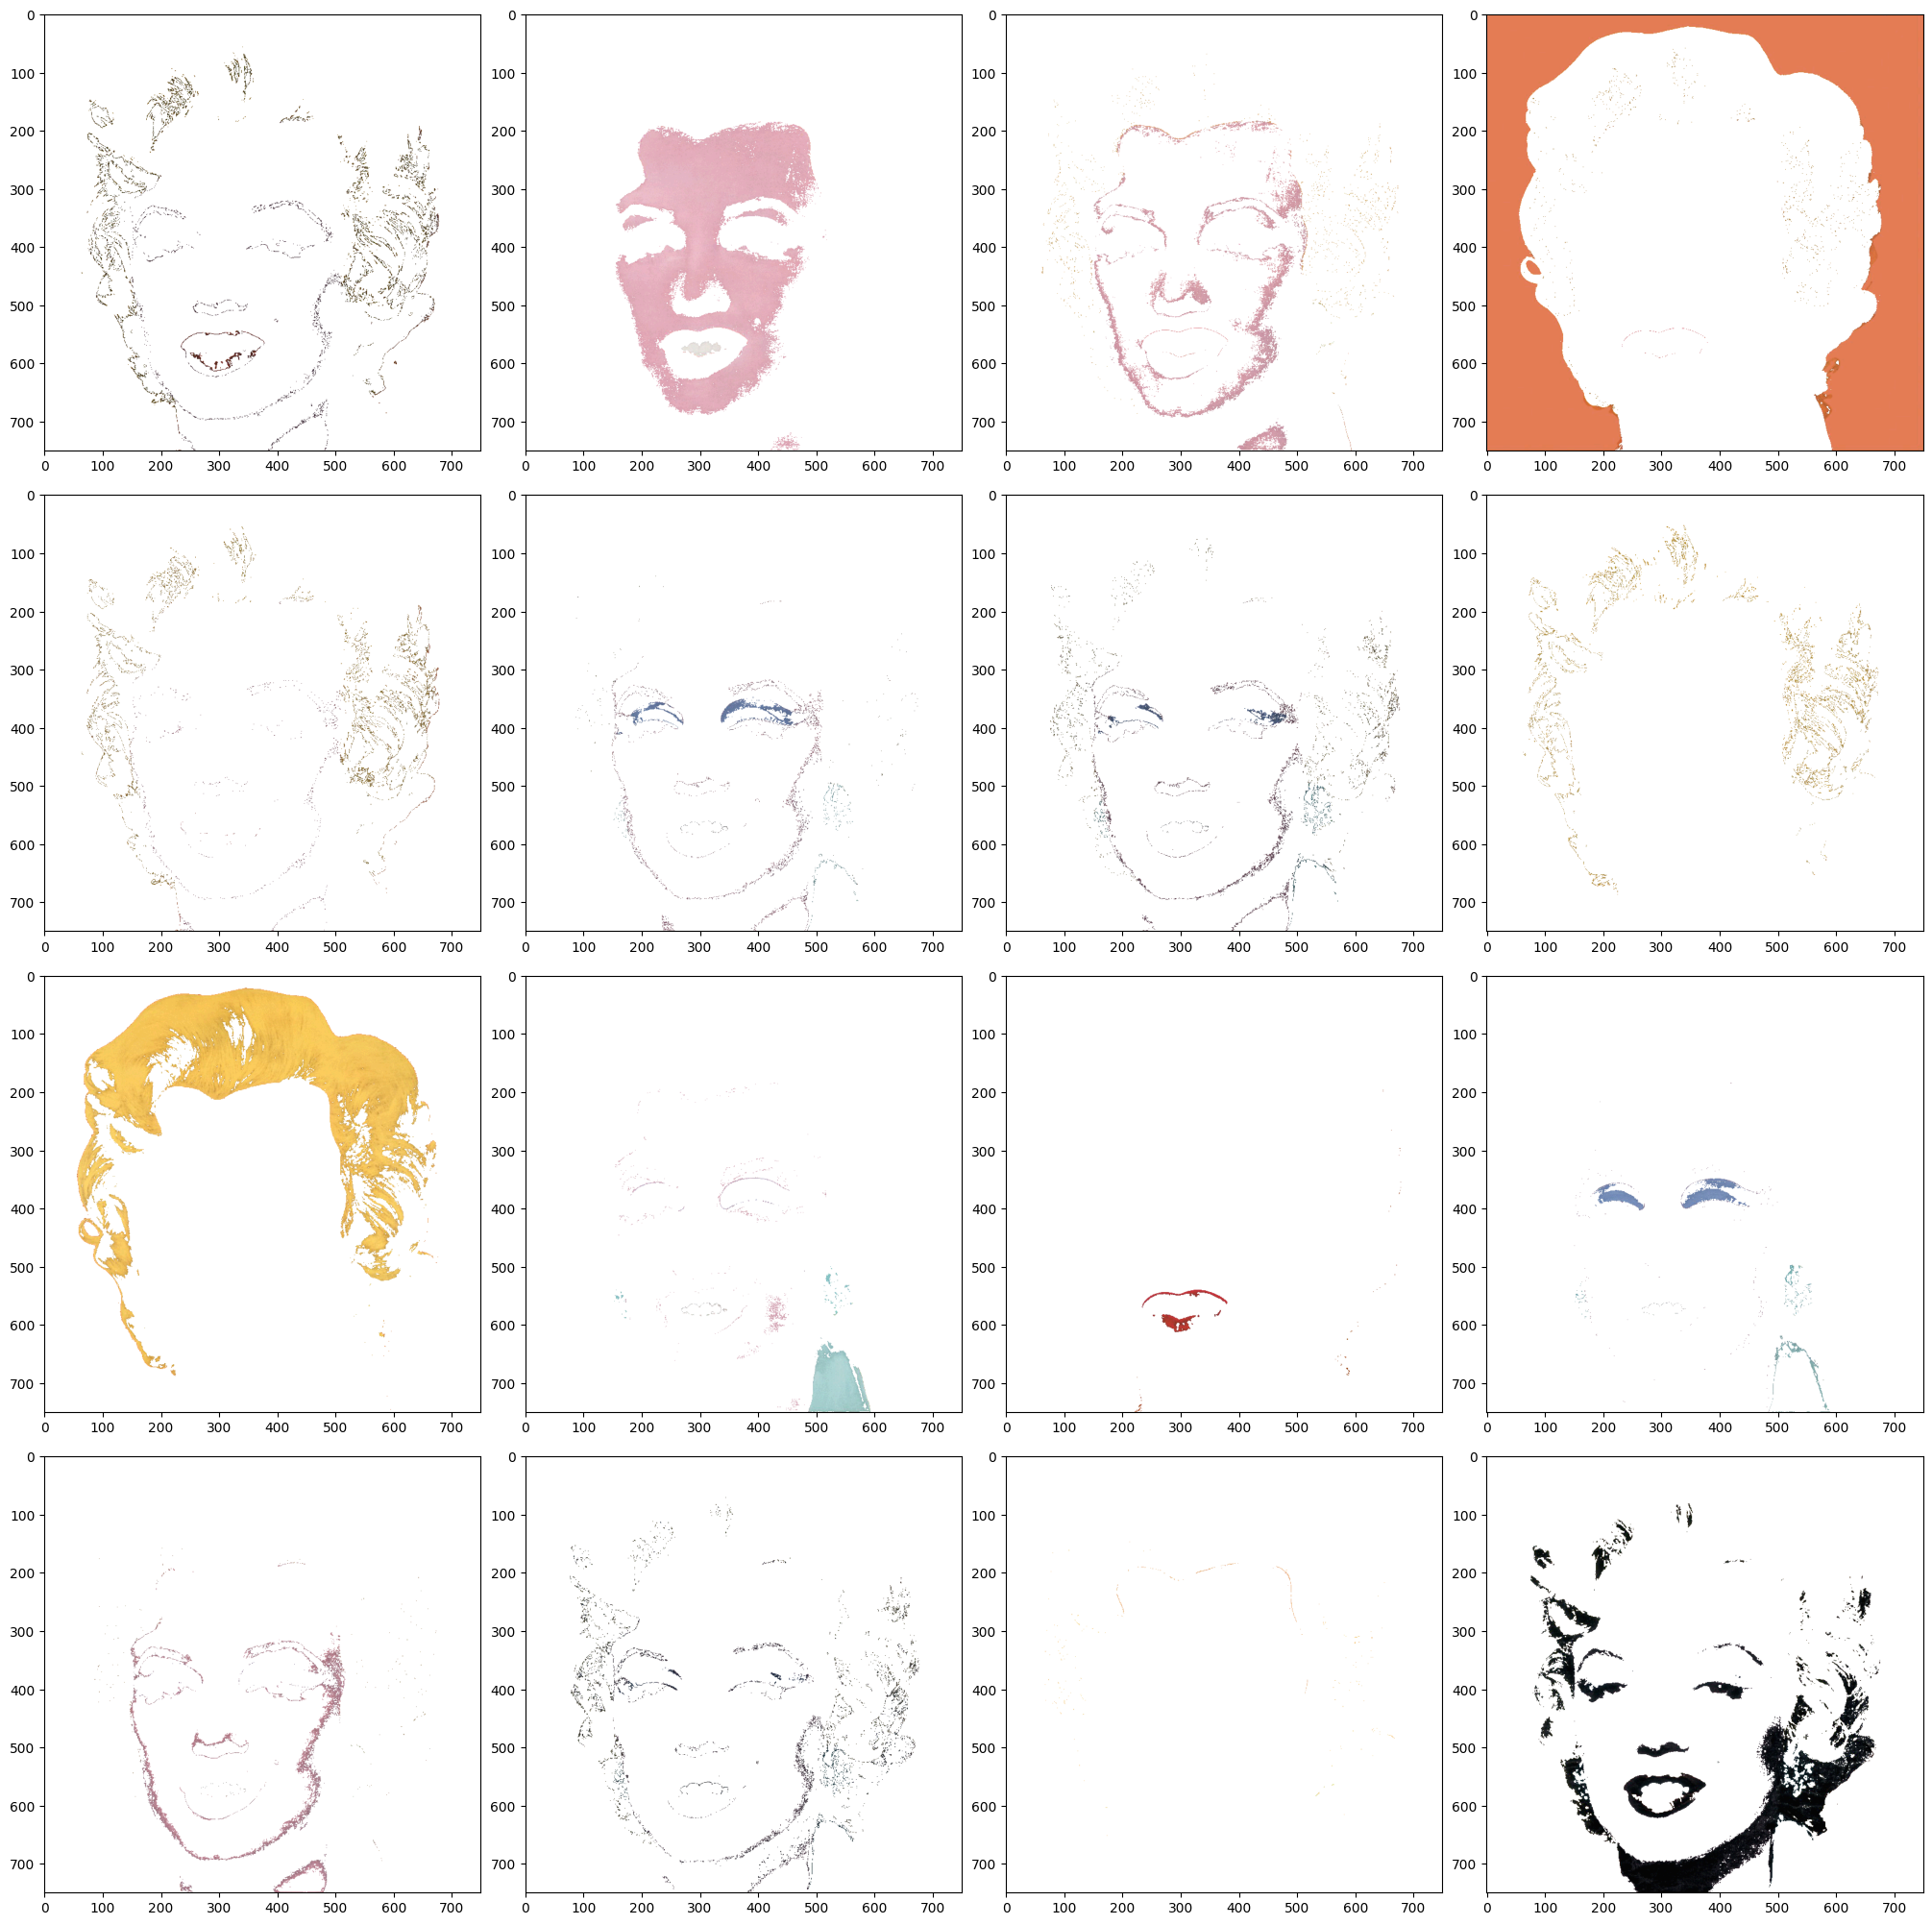

In [21]:
#display all clusters
#https://stackoverflow.com/questions/41793931/plotting-images-side-by-side-using-matplotlib
fig, axes = plt.subplots(nrows=4, ncols = 4,figsize=(20, 20), layout = 'constrained')
axes[0][0].imshow(cluster(0,'orange_center.png'))
axes[0][1].imshow(cluster(1,'orange_center.png'))
axes[0][2].imshow(cluster(2,'orange_center.png'))
axes[0][3].imshow(cluster(3,'orange_center.png'))
axes[1][0].imshow(cluster(4,'orange_center.png'))
axes[1][1].imshow(cluster(5,'orange_center.png'))
axes[1][2].imshow(cluster(6,'orange_center.png'))
axes[1][3].imshow(cluster(7,'orange_center.png'))
axes[2][0].imshow(cluster(8,'orange_center.png'))
axes[2][1].imshow(cluster(9,'orange_center.png'))
axes[2][2].imshow(cluster(10,'orange_center.png'))
axes[2][3].imshow(cluster(11,'orange_center.png'))
axes[3][0].imshow(cluster(12,'orange_center.png'))
axes[3][1].imshow(cluster(13,'orange_center.png'))
axes[3][2].imshow(cluster(14,'orange_center.png'))
axes[3][3].imshow(cluster(15,'orange_center.png'))

In [22]:
#repeat dendrograms for the other 4 marilyns
## read in the other four marilyns
aqua = "AQUA.png"
img1 = Image.open(aqua) 
red = "RED.png"
img2 = Image.open(red) 
green = "GREEN.png"
img3 = Image.open(green)
blue = "BLUE.jpeg"
img4 = Image.open(blue)

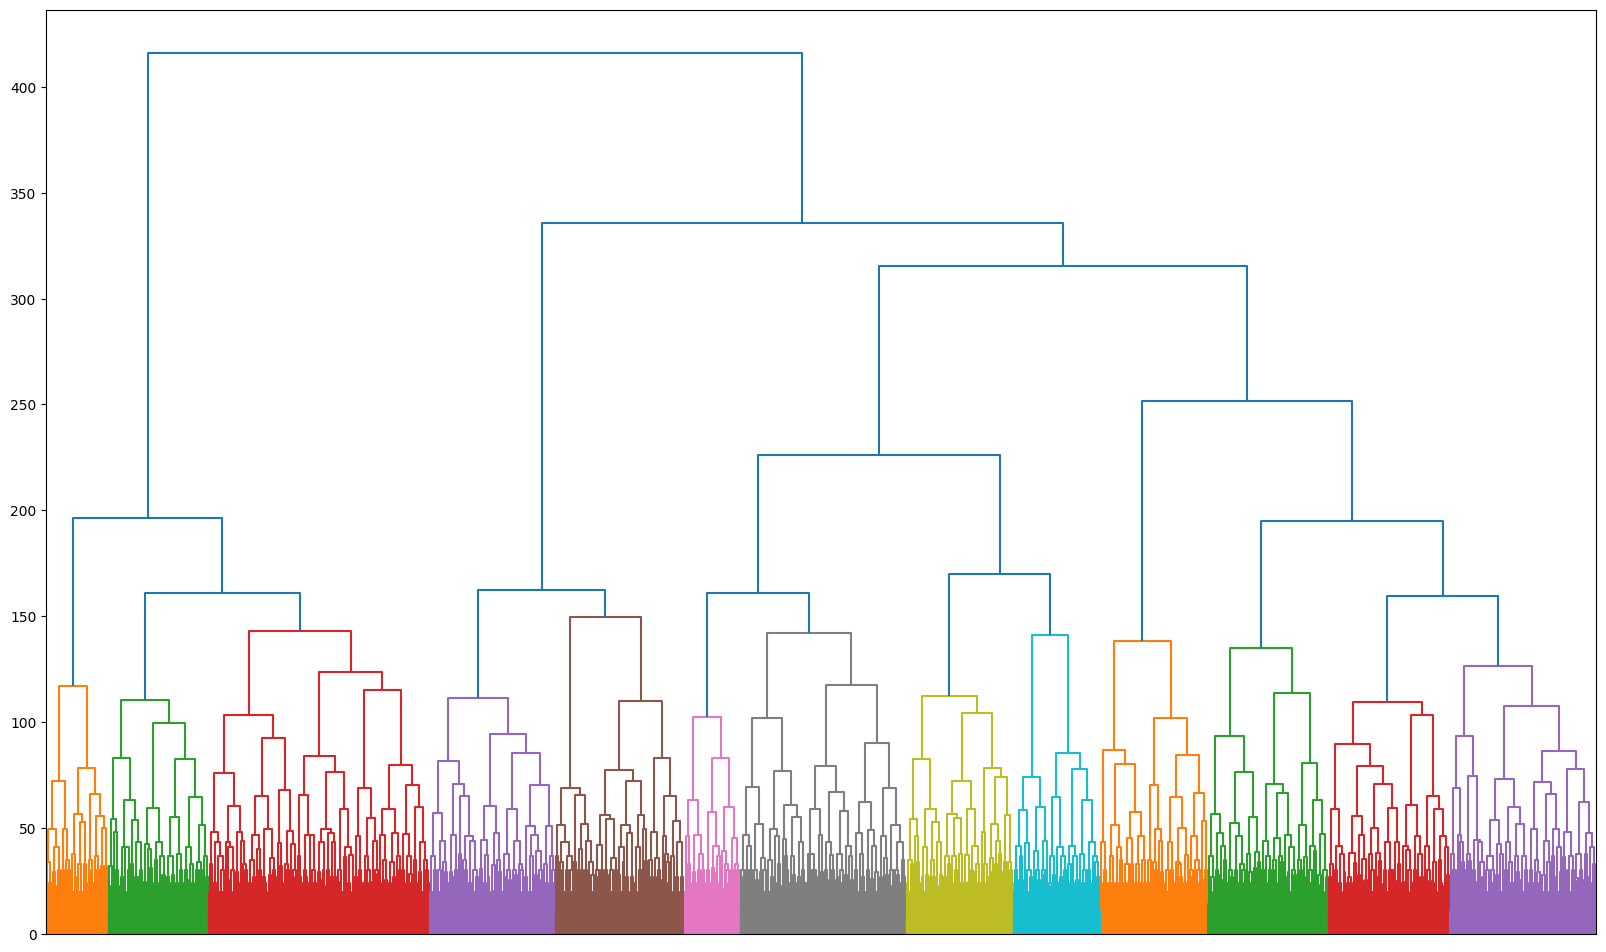

In [23]:
#Aqua
## get pixels
aqua_p = extract(aqua) 
#centering
for i,j in zip(range(0,256),center):
    aqua_p['R'] = aqua_p['R'].replace(i,j)
    aqua_p['G'] = aqua_p['G'].replace(i,j)
    aqua_p['B'] = aqua_p['B'].replace(i,j)
#convert to numpy array for clustering
aqua_p.to_numpy()
dfA1 = [tuple(i) for i in aqua_p.to_numpy()]
imA = Image.open('AQUA.png') 
pix = imA.load()
for x,y,R,G,B in dfA1:
    pix[x,y] = (R,G,B)
imA
imA.save('aqua_center.png') #save centered aqua
dfA2 = aqua_p.iloc[:,2:].drop_duplicates()
clust = AgglomerativeClustering(n_clusters=16, linkage='average')
clusts = clust.fit(np.asarray(dfA2))
dfA2['Cluster'] = clusts.labels_
distanceA = linkage(dfA2.to_numpy(), method = 'complete')
plt.figure(figsize = (20,12))
#color threshold see y values, colors based on if the node reaches that value
dendrogram(distanceA, no_labels = True, color_threshold = 150)
plt.show()

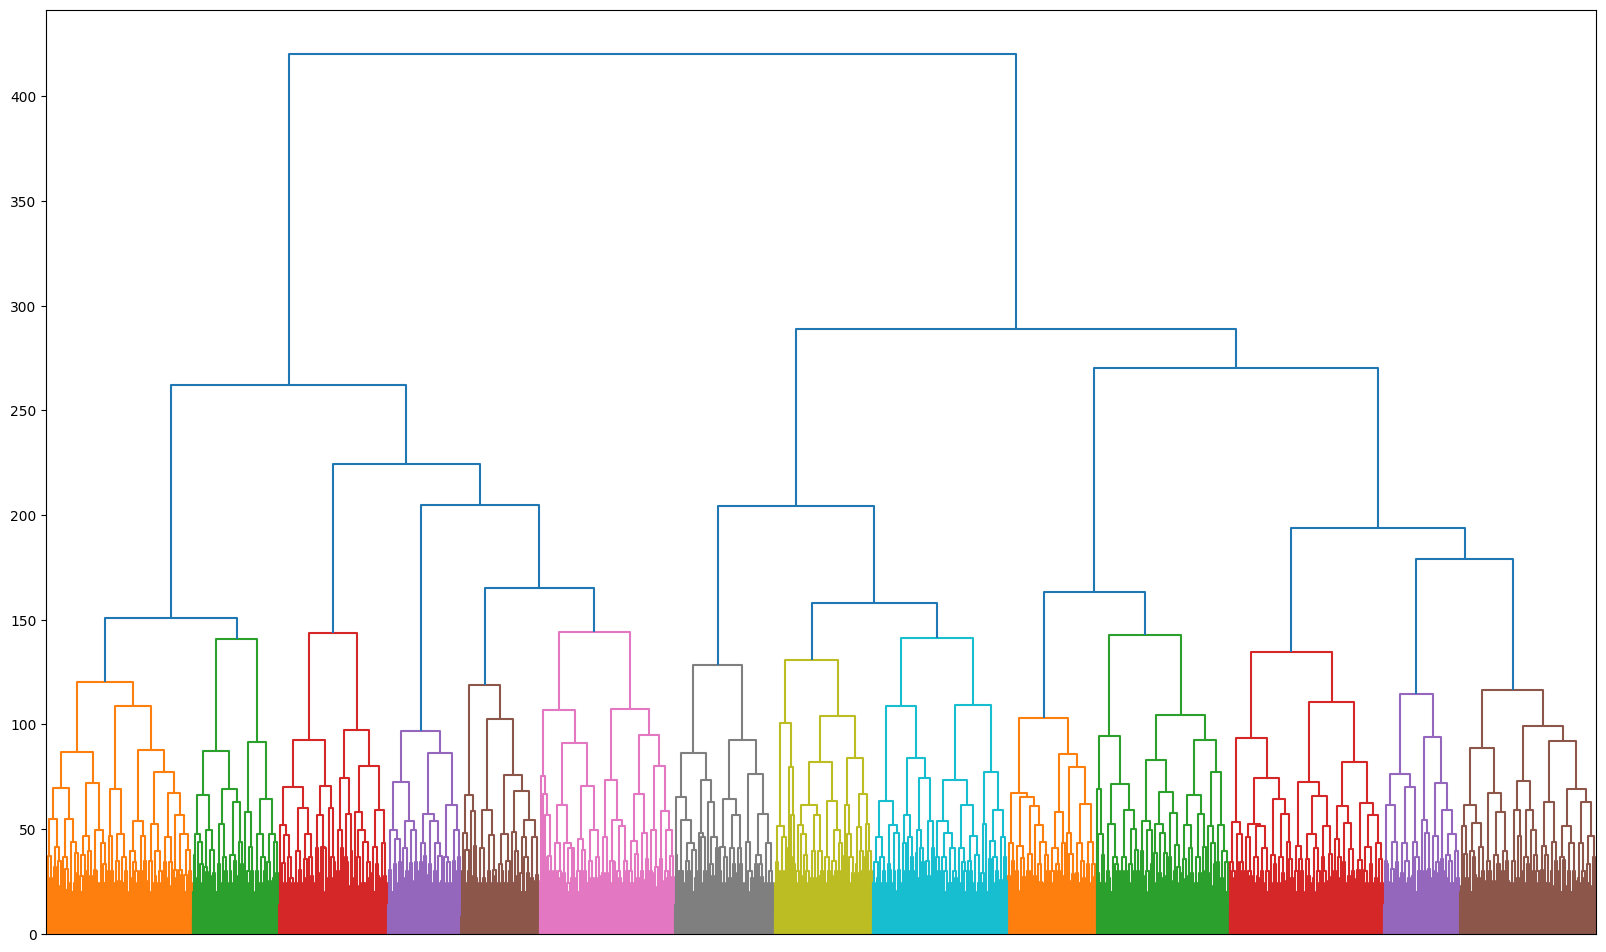

In [24]:
#Red
## get pixels
red_p = extract(red) 
#centering
for i,j in zip(range(0,256),center):
    red_p['R'] = red_p['R'].replace(i,j)
    red_p['G'] = red_p['G'].replace(i,j)
    red_p['B'] = red_p['B'].replace(i,j)
#convert to numpy array for clustering
red_p.to_numpy()
dfR1 = [tuple(i) for i in red_p.to_numpy()]
imR = Image.open('RED.png') 
pix = imR.load()
for x,y,R,G,B in dfR1:
    pix[x,y] = (R,G,B)
imR
imR.save('red_center.png') #save centered aqua
dfR2 = red_p.iloc[:,2:].drop_duplicates()
clust2 = AgglomerativeClustering(n_clusters=16, linkage='average')
clusts2 = clust2.fit(np.asarray(dfR2))
dfR2['Cluster'] = clusts2.labels_
distanceR = linkage(dfR2.to_numpy(), method = 'complete')
plt.figure(figsize = (20,12))
#color threshold see y values, colors based on if the node reaches that value
dendrogram(distanceR, no_labels = True, color_threshold = 150)
plt.show()

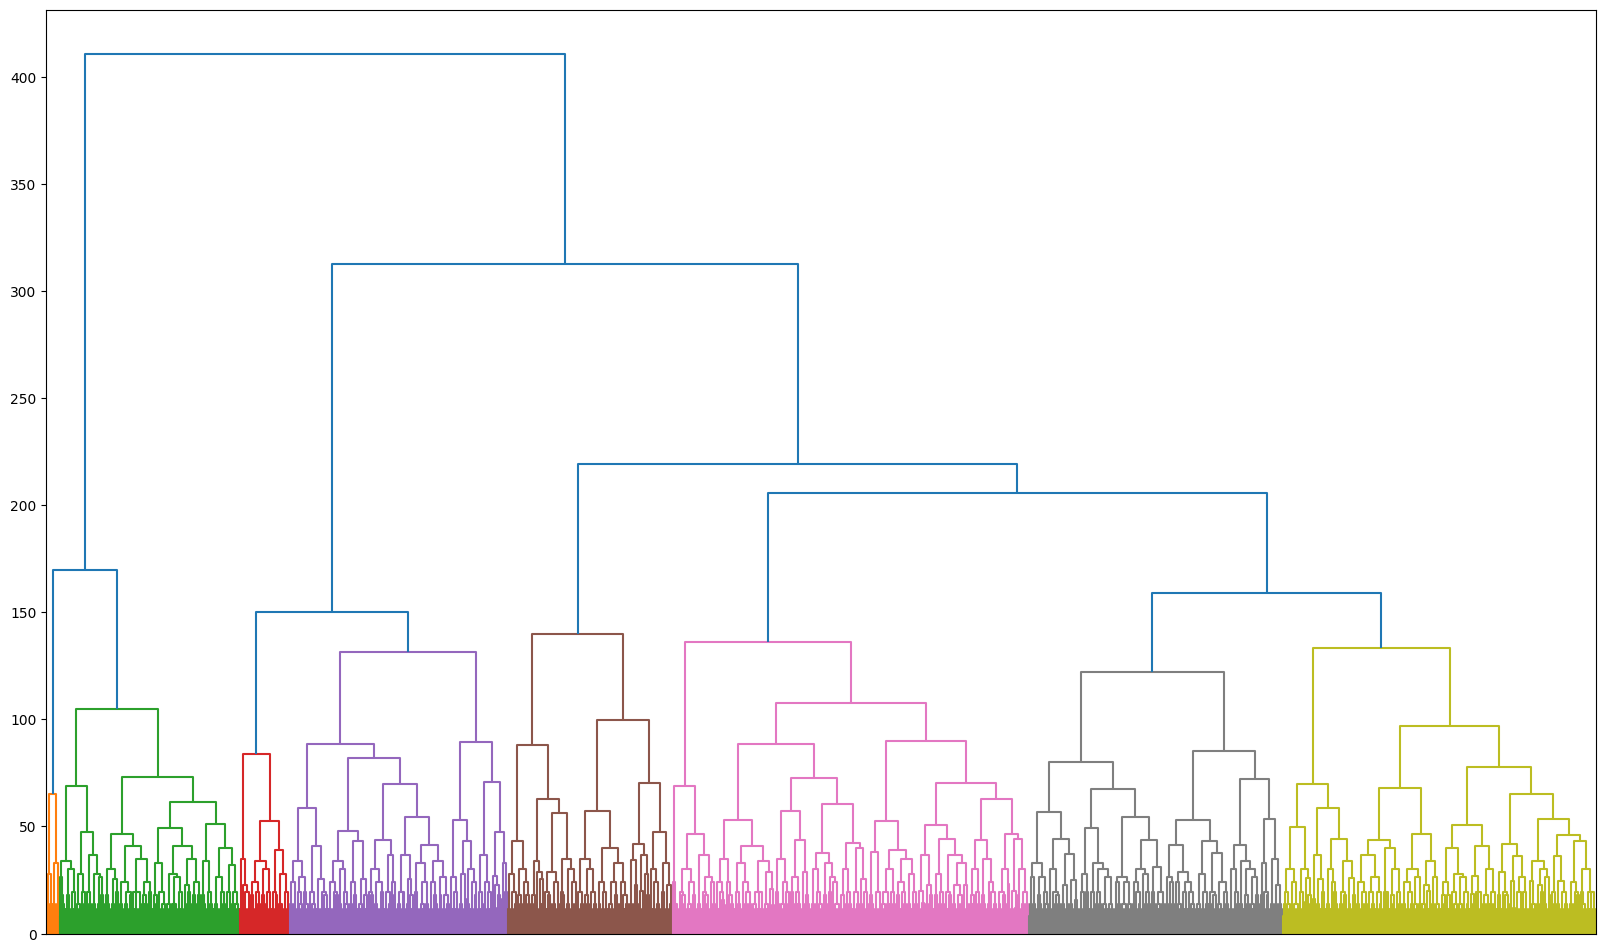

In [25]:
#Green
## get pixels
green_p = extract(green) 
#centering
for i,j in zip(range(0,256),center):
    green_p['R'] = green_p['R'].replace(i,j)
    green_p['G'] = green_p['G'].replace(i,j)
    green_p['B'] = green_p['B'].replace(i,j)
#convert to numpy array for clustering
green_p.to_numpy()
dfG1 = [tuple(i) for i in green_p.to_numpy()]
imG = Image.open('GREEN.png') 
pixG = imG.load()
for x,y,R,G,B in dfG1:
    pixG[x,y] = (R,G,B)
imG
imG.save('green_center.png') #save centered aqua
dfG2 = green_p.iloc[:,2:].drop_duplicates()
clustG = AgglomerativeClustering(n_clusters=16, linkage='average')
clustsG = clustG.fit(np.asarray(dfG2))
dfG2['Cluster'] = clustsG.labels_
distanceG = linkage(dfG2.to_numpy(), method = 'complete')
plt.figure(figsize = (20,12))
#color threshold see y values, colors based on if the node reaches that value
dendrogram(distanceG, no_labels = True, color_threshold = 150)
plt.show()

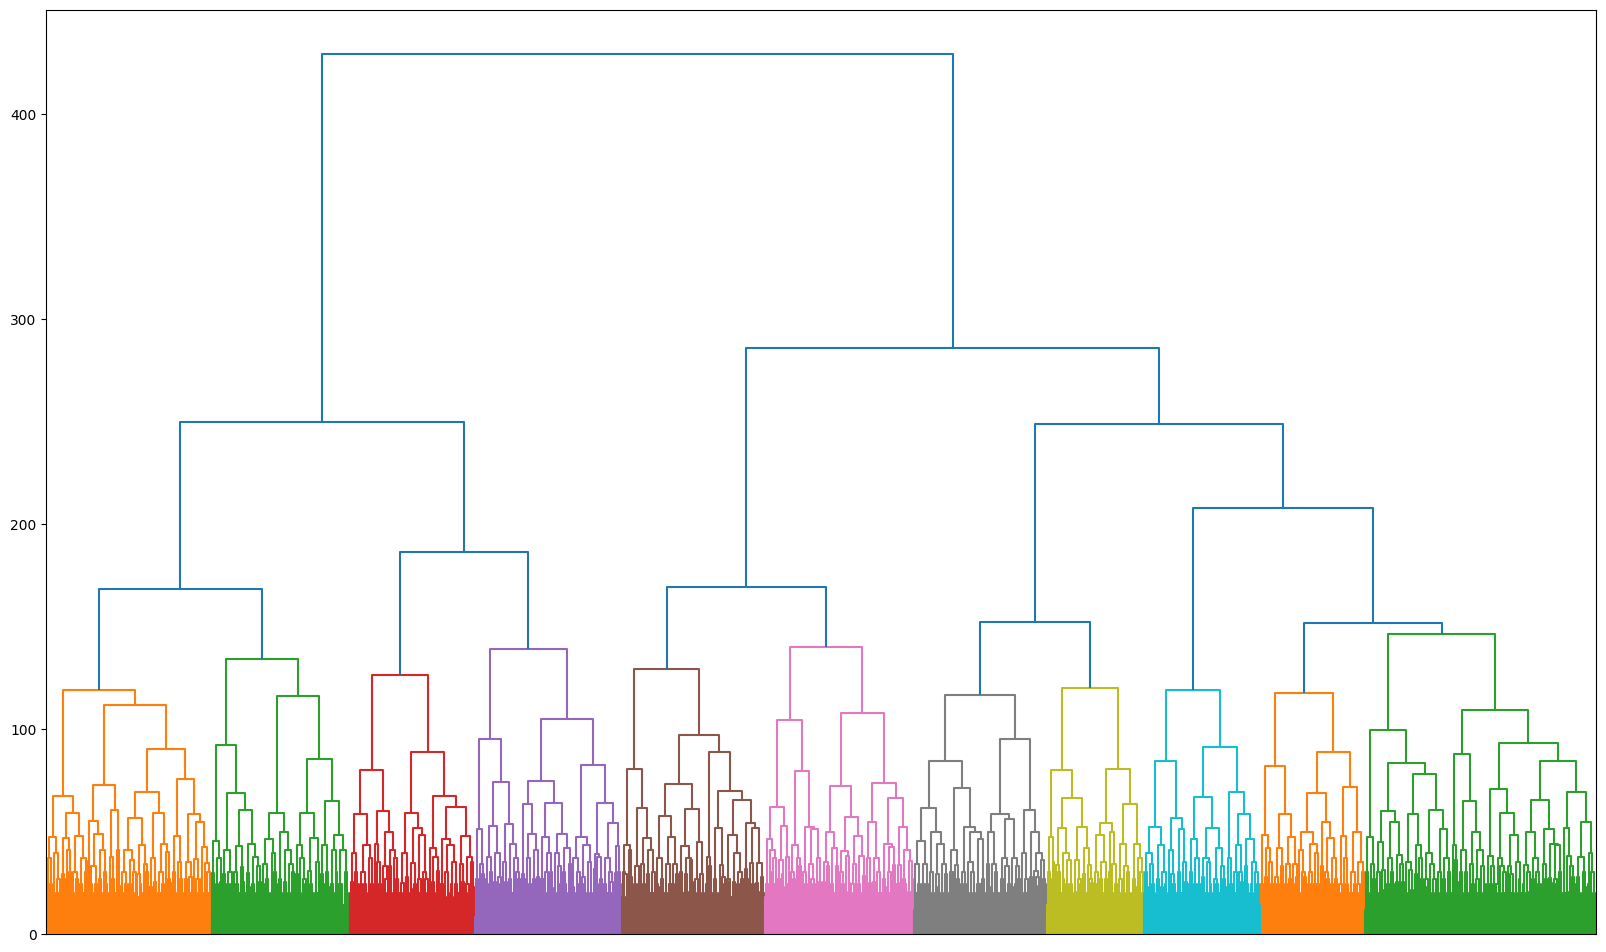

In [26]:
#Blue
## get pixels
blue_p = extract(blue) 
#centering
for i,j in zip(range(0,256),center):
    blue_p['R'] = blue_p['R'].replace(i,j)
    blue_p['G'] = blue_p['G'].replace(i,j)
    blue_p['B'] = blue_p['B'].replace(i,j)
#convert to numpy array for clustering
blue_p.to_numpy()
dfB1 = [tuple(i) for i in blue_p.to_numpy()]
imB = Image.open('BLUE.jpeg') 
pixB = imB.load()
for x,y,R,G,B in dfB1:
    pixB[x,y] = (R,G,B)
imB
imB.save('blue_center.png') #save centered aqua
dfB2 = blue_p.iloc[:,2:].drop_duplicates()
clustB = AgglomerativeClustering(n_clusters=16, linkage='average')
clustsB = clustB.fit(np.asarray(dfB2))
dfB2['Cluster'] = clustsB.labels_
distanceB = linkage(dfB2.to_numpy(), method = 'complete')
plt.figure(figsize = (20,12))
#color threshold see y values, colors based on if the node reaches that value
dendrogram(distanceB, no_labels = True, color_threshold = 150)
plt.show()

In [27]:
#Region of interest plots
#use the pixel data and take those as saved images for the clusters 
### get background clusters of each marilyn cluster4 or technically 3
 
#Blue background = cluster 12 
#part of eyeshadow (good enough) =cluster 13
#extract each individual cluster part
## get the most common color in that cluster
dfBB = extract('blue_center.png')
df3B = dfBB.merge(dfB2,on = ['R','G','B'],how = 'inner')
df3 = df3B
#Save cluster
blue_back = cluster(12,'blue_center.png')
blue_back.save('blue_back.png')
blue_eye=cluster(13,'blue_center.png')
blue_eye.save('blue_eye.png')

In [28]:
#Red background = cluster 0
#part of eyeshadow (good enough) =cluster 9
#extract each individual cluster part
## get the most common color in that cluster
dfR4 = extract('red_center.png')
df3R = dfR4.merge(dfR2,on = ['R','G','B'],how = 'inner')
df3 = df3R
#Save cluster use 10 for both i guess
red_back = cluster(0,'red_center.png') #some lips
red_back.save('red_back.png')
red_eye=cluster(9,'red_center.png')
red_eye.save('red_eye.png')

In [29]:
#green background
dfG4 = extract('green_center.png')
df3G = dfG4.merge(dfG2,on = ['R','G','B'],how = 'inner')
df3 = df3G
#Save cluster
green_back=cluster(1,'green_center.png')
green_back.save('green_back.png')
green_eye=cluster(0,'green_center.png')
green_eye.save('green_eye.png')

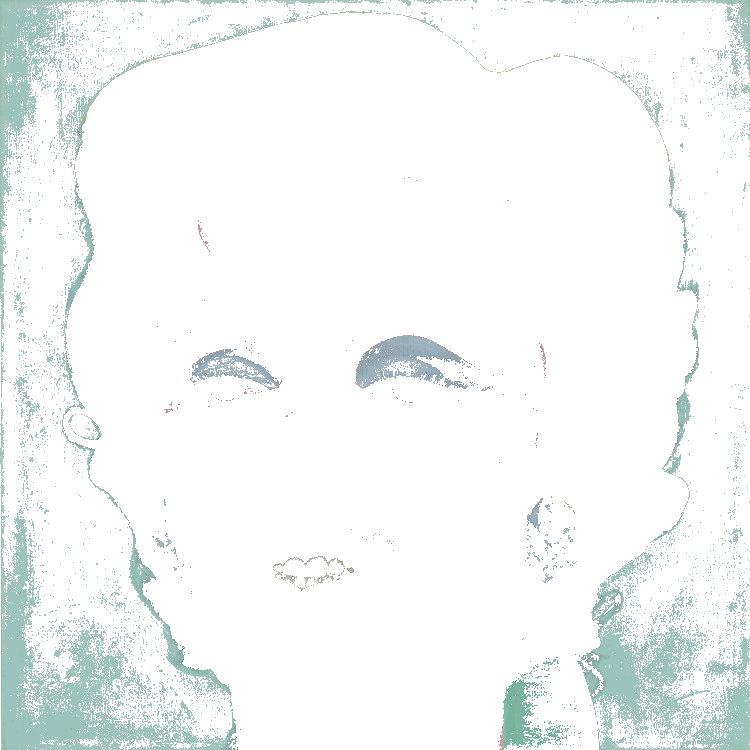

In [30]:
cluster(0,'green_center.png')

In [31]:
#Aqua background
dfA4 = extract('aqua_center.png')
df3A = dfA4.merge(dfA2,on = ['R','G','B'],how = 'inner')
df3 = df3A
#Save cluster
aqua_back=cluster(3,'aqua_center.png')
aqua_back.save('aqua_back.png')
aqua_eye=cluster(6,'aqua_center.png')
aqua_eye.save('aqua_eye.png')

In [34]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

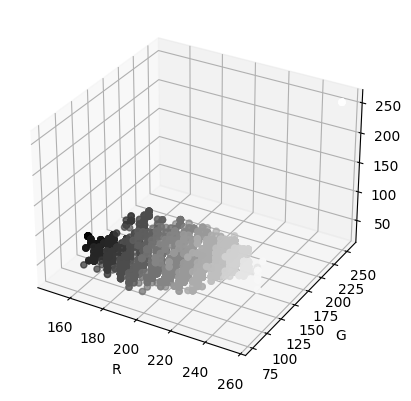

In [38]:
#Using hazels's code to make rgb plots 
#orange backgorund
o_back = extract('orange_back.png')
ax = plt.axes(projection='3d')
ax.scatter3D(o_back['R'], o_back['G'], o_back['B'], c=o_back['R'], cmap='gray')
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
plt.show

Text(0, 0.5, 'Blue')

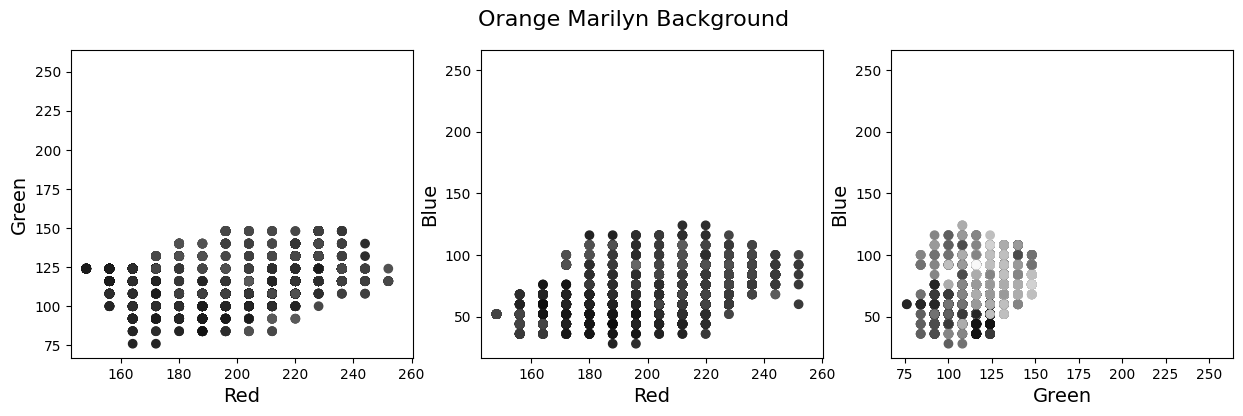

In [41]:
#2d Orange marilyn shit
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,4))
fig.suptitle('Orange Marilyn Background', fontsize = 16)
ax1.scatter(o_back['R'], o_back['G'], c = o_back['B'], cmap ='gray')
ax1.set_xlabel('Red', fontsize = 14)
ax1.set_ylabel('Green', fontsize = 14)
ax2.scatter(o_back['R'], o_back['B'], c = o_back['G'], cmap ='gray')
ax2.set_xlabel('Red', fontsize = 14)
ax2.set_ylabel('Blue', fontsize = 14)
ax3.scatter(o_back['G'], o_back['B'], c = o_back['R'], cmap ='gray')
ax3.set_xlabel('Green', fontsize = 14)
ax3.set_ylabel('Blue', fontsize = 14)

Text(0, 0.5, 'Blue')

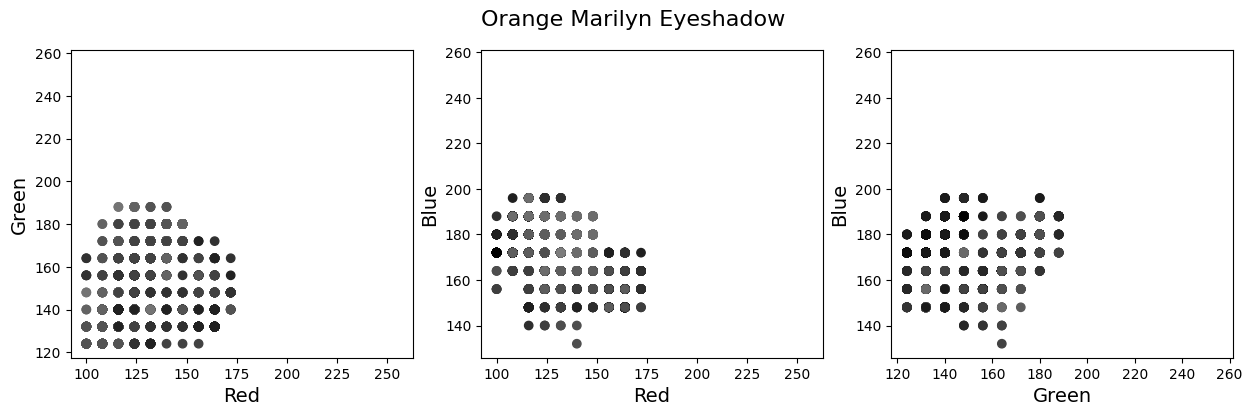

In [42]:
#orange eyshadow
o_eye = extract('orange_eye.png')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,4))
fig.suptitle('Orange Marilyn Eyeshadow', fontsize = 16)
ax1.scatter(o_eye['R'], o_eye['G'], c = o_eye['B'], cmap ='gray')
ax1.set_xlabel('Red', fontsize = 14)
ax1.set_ylabel('Green', fontsize = 14)
ax2.scatter(o_eye['R'], o_eye['B'], c = o_eye['G'], cmap ='gray')
ax2.set_xlabel('Red', fontsize = 14)
ax2.set_ylabel('Blue', fontsize = 14)
ax3.scatter(o_eye['G'], o_eye['B'], c = o_eye['R'], cmap ='gray')
ax3.set_xlabel('Green', fontsize = 14)
ax3.set_ylabel('Blue', fontsize = 14)

<function matplotlib.pyplot.show(close=None, block=None)>

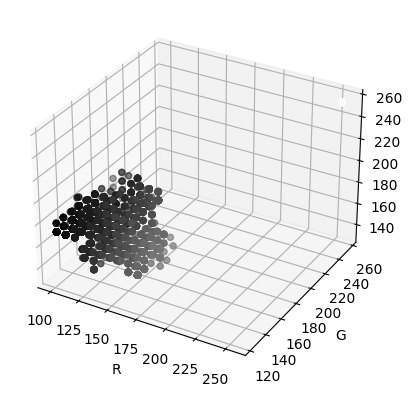

In [39]:
#Orange eyeshadow
o_eye = extract('orange_eye.png')
ax = plt.axes(projection='3d')
ax.scatter3D(o_eye['R'], o_eye['G'], o_eye['B'], c=o_eye['R'], cmap='gray')
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
plt.show

Text(0, 0.5, 'Blue')

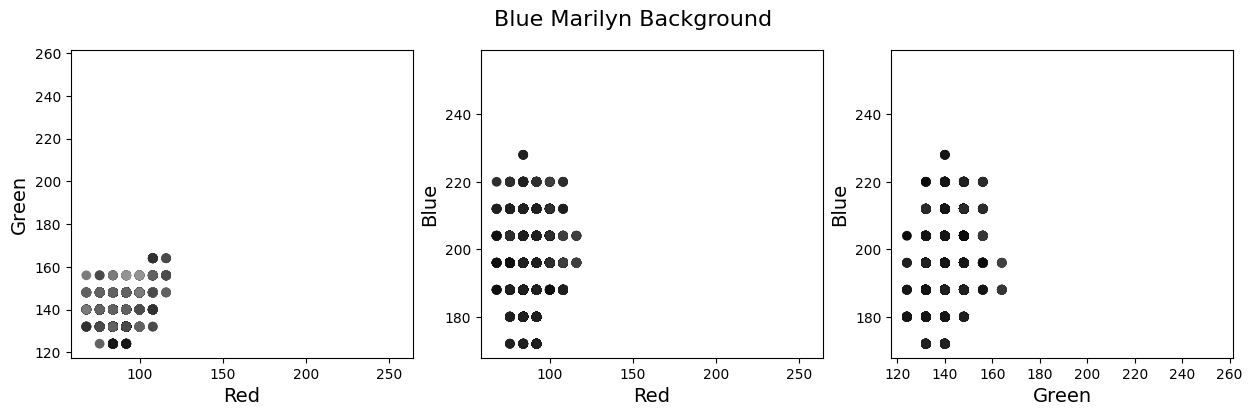

In [45]:
#Blue Back
b_back = extract('blue_back.png')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,4))
fig.suptitle('Blue Marilyn Background', fontsize = 16)
ax1.scatter(b_back['R'], b_back['G'], c = b_back['B'], cmap ='gray')
ax1.set_xlabel('Red', fontsize = 14)
ax1.set_ylabel('Green', fontsize = 14)
ax2.scatter(b_back['R'], b_back['B'], c = b_back['G'], cmap ='gray')
ax2.set_xlabel('Red', fontsize = 14)
ax2.set_ylabel('Blue', fontsize = 14)
ax3.scatter(b_back['G'], b_back['B'], c = b_back['R'], cmap ='gray')
ax3.set_xlabel('Green', fontsize = 14)
ax3.set_ylabel('Blue', fontsize = 14)

Text(0, 0.5, 'Blue')

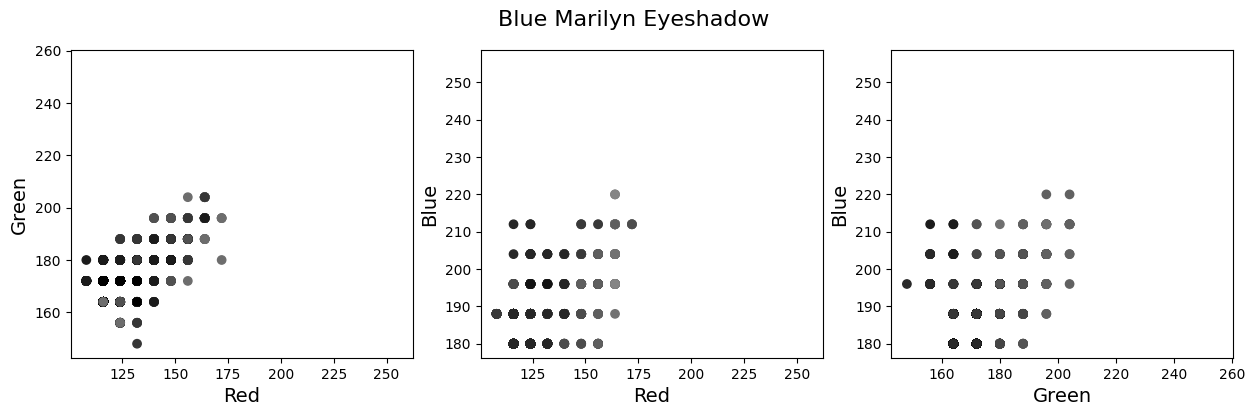

In [46]:
#Blue Eye
b_eye = extract('blue_eye.png')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,4))
fig.suptitle('Blue Marilyn Eyeshadow', fontsize = 16)
ax1.scatter(b_eye['R'], b_eye['G'], c = b_eye['B'], cmap ='gray')
ax1.set_xlabel('Red', fontsize = 14)
ax1.set_ylabel('Green', fontsize = 14)
ax2.scatter(b_eye['R'], b_eye['B'], c = b_eye['G'], cmap ='gray')
ax2.set_xlabel('Red', fontsize = 14)
ax2.set_ylabel('Blue', fontsize = 14)
ax3.scatter(b_eye['G'], b_eye['B'], c = b_eye['R'], cmap ='gray')
ax3.set_xlabel('Green', fontsize = 14)
ax3.set_ylabel('Blue', fontsize = 14)

Text(0, 0.5, 'Blue')

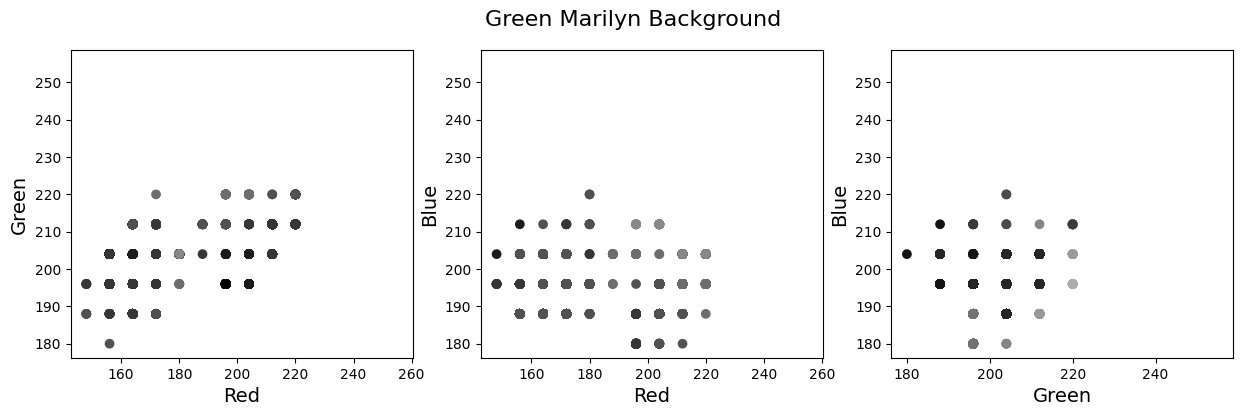

In [47]:
#Green Back
g_back = extract('green_back.png')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,4))
fig.suptitle('Green Marilyn Background', fontsize = 16)
ax1.scatter(g_back['R'], g_back['G'], c = g_back['B'], cmap ='gray')
ax1.set_xlabel('Red', fontsize = 14)
ax1.set_ylabel('Green', fontsize = 14)
ax2.scatter(g_back['R'], g_back['B'], c = g_back['G'], cmap ='gray')
ax2.set_xlabel('Red', fontsize = 14)
ax2.set_ylabel('Blue', fontsize = 14)
ax3.scatter(g_back['G'], g_back['B'], c = g_back['R'], cmap ='gray')
ax3.set_xlabel('Green', fontsize = 14)
ax3.set_ylabel('Blue', fontsize = 14)

Text(0, 0.5, 'Blue')

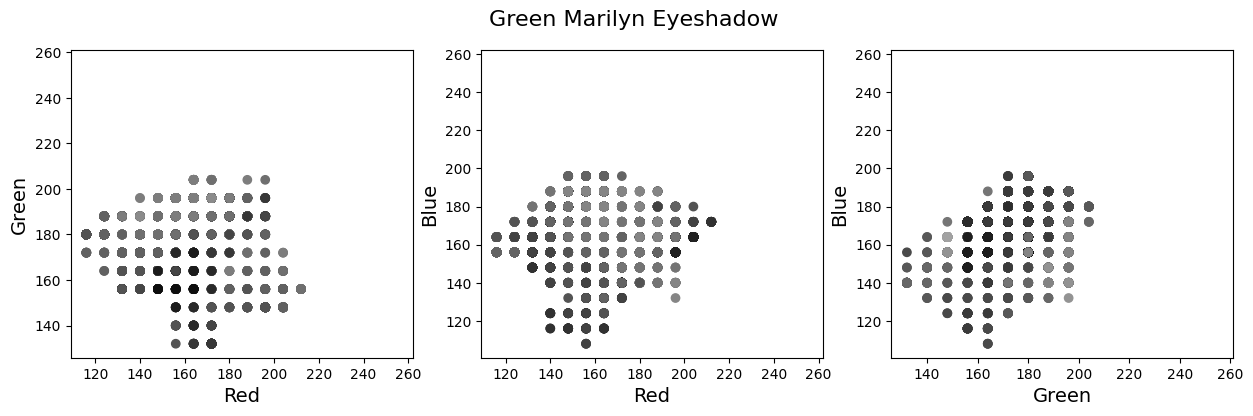

In [52]:
#Green Eye
g_eye = extract('green_eye.png')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,4))
fig.suptitle('Green Marilyn Eyeshadow', fontsize = 16)
ax1.scatter(g_eye['R'], g_eye['G'], c = g_eye['B'], cmap ='gray')
ax1.set_xlabel('Red', fontsize = 14)
ax1.set_ylabel('Green', fontsize = 14)
ax2.scatter(g_eye['R'], g_eye['B'], c = g_eye['G'], cmap ='gray')
ax2.set_xlabel('Red', fontsize = 14)
ax2.set_ylabel('Blue', fontsize = 14)
ax3.scatter(g_eye['G'], g_eye['B'], c = g_eye['R'], cmap ='gray')
ax3.set_xlabel('Green', fontsize = 14)
ax3.set_ylabel('Blue', fontsize = 14)

In [ ]:
#Aqua Back
a_back = extract('aqua_back.png')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,4))
fig.suptitle('Aqua Marilyn Background', fontsize = 16)
ax1.scatter(a_back['R'], a_back['G'], c = a_back['B'], cmap ='gray')
ax1.set_xlabel('Red', fontsize = 14)
ax1.set_ylabel('Green', fontsize = 14)
ax2.scatter(a_back['R'], a_back['B'], c = a_back['G'], cmap ='gray')
ax2.set_xlabel('Red', fontsize = 14)
ax2.set_ylabel('Blue', fontsize = 14)
ax3.scatter(a_back['G'], a_back['B'], c = a_back['R'], cmap ='gray')
ax3.set_xlabel('Green', fontsize = 14)
ax3.set_ylabel('Blue', fontsize = 14)

Text(0, 0.5, 'Blue')

Text(0, 0.5, 'Blue')

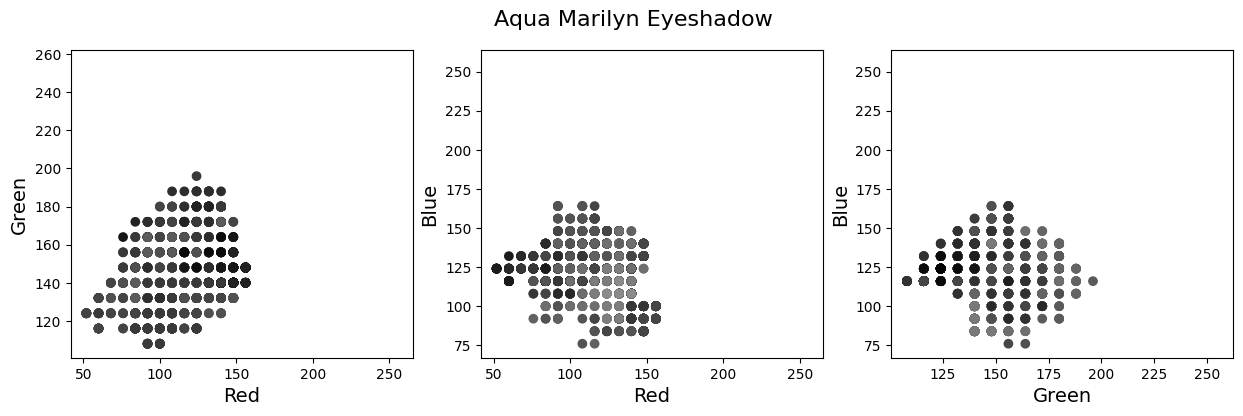

In [51]:
#Aqua Eye
a_eye = extract('aqua_eye.png')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,4))
fig.suptitle('Aqua Marilyn Eyeshadow', fontsize = 16)
ax1.scatter(a_eye['R'], a_eye['G'], c = a_eye['B'], cmap ='gray')
ax1.set_xlabel('Red', fontsize = 14)
ax1.set_ylabel('Green', fontsize = 14)
ax2.scatter(a_eye['R'], a_eye['B'], c = a_eye['G'], cmap ='gray')
ax2.set_xlabel('Red', fontsize = 14)
ax2.set_ylabel('Blue', fontsize = 14)
ax3.scatter(a_eye['G'], a_eye['B'], c = a_eye['R'], cmap ='gray')
ax3.set_xlabel('Green', fontsize = 14)
ax3.set_ylabel('Blue', fontsize = 14)

In [ ]:
#red back
r_back = extract('red_back.png')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,4))
fig.suptitle('Red Marilyn Background', fontsize = 16)
ax1.scatter(r_back['R'], r_back['G'], c = r_back['B'], cmap ='gray')
ax1.set_xlabel('Red', fontsize = 14)
ax1.set_ylabel('Green', fontsize = 14)
ax2.scatter(r_back['R'], r_back['B'], c = r_back['G'], cmap ='gray')
ax2.set_xlabel('Red', fontsize = 14)
ax2.set_ylabel('Blue', fontsize = 14)
ax3.scatter(r_back['G'], r_back['B'], c = r_back['R'], cmap ='gray')
ax3.set_xlabel('Green', fontsize = 14)
ax3.set_ylabel('Blue', fontsize = 14)

In [ ]:
#red eye
r_eye = extract('red_eye.png')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,4))
fig.suptitle('Red Marilyn Eyeshadow', fontsize = 16)
ax1.scatter(r_eye['R'], r_eye['G'], c = r_eye['B'], cmap ='gray')
ax1.set_xlabel('Red', fontsize = 14)
ax1.set_ylabel('Green', fontsize = 14)
ax2.scatter(r_eye['R'], r_eye['B'], c = r_eye['G'], cmap ='gray')
ax2.set_xlabel('Red', fontsize = 14)
ax2.set_ylabel('Blue', fontsize = 14)
ax3.scatter(r_eye['G'], r_eye['B'], c = r_eye['R'], cmap ='gray')
ax3.set_xlabel('Green', fontsize = 14)
ax3.set_ylabel('Blue', fontsize = 14)